<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Assignment/0919-Handson-ch04-model-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 4. 모델 훈련**

## **4.1 선형 회귀**
- 일반적인 선형 모델 - 입력 특성의 가중치 합과 편향이라는 상수를 더해 예측 만듦

*선형 회귀 모델의 예측*
$$\hat{y} = \theta_0 + \theta_1x_1 + \cdots  + \theta_nx_n$$

-    - $\hat{y}$: 예측값
    - $n$: 특성의 수
    - $x_i$: i번째 특성값
    - $\theta_j$: j번째 모델 파라미터 (편향 $\theta_0$과 특성의 가중치 포함)


*선형 회귀 모델의 예측(벡터 형태)*
$$\hat{y} = h_{\theta}(x) = \theta \cdot x$$

- - $\theta$: 편향 $\theta_0$과 $\theta_1$
에서 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터
    - x: $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터. $x_0$는 항상 1임
    - $\theta \cdot x$: 벡터 $\theta$와 x의 점곱.
    - $h_\theta$: 모델 파라미터 $\theta$를 사용한 가설 함수
    
- 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것임.
    - 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 함.
    - 실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 더 간단함.

### 4.1.1 정규방정식

*정규방정식*
$$\hat{\theta} = (X^TX)^{-1} X^Ty$$

- $\hat{\theta}$는 비용함수를 최소화 하는 $\theta$값
- y는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

- 테스트를 위해 선형처럼 보이는 데이터 생성

In [1]:
import numpy as np

X = 2* np.random.rand(100,1)
y = 4+3*X + np.random.rand(100,1)

- 정규방정식을 사용해 $\hat{\theta}$을 계산
    - 데이터를 생성하기 위해 사용한 함수: $y=4+3x_1+가우시안 잡음$

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

- 정규방정식으로 계산한 값을 확인

In [4]:
theta_best

array([[4.36798517],
       [3.0760125 ]])

&rarr; $\theta_0 = 4.215$와 $\theta_1 = 2.770$ 대신 $\theta_0 = 4$와 $\theta_1 = 3$을 기대했었음. 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못했음.

- $\hat{\theta}$을 사용해 예측

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.36798517],
       [10.52001017]])

- 모델의 예측을 그래프에 나타내기

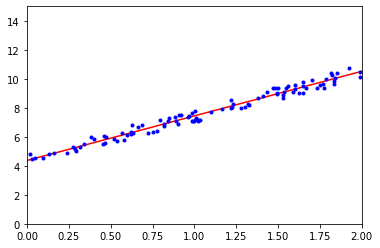

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

- 사이킷런에서 선형 회귀 수행

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.36798517]), array([[3.0760125]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.36798517],
       [10.52001017]])

- LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수를 기반으로 함. 함수 직접 호출

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.36798517],
       [3.0760125 ]])

&rarr; 이 함수는 $\hat{\theta} = X + y$을 계산함. 여기에서 X+는 X의 유사역행렬임.
- `np.linalg.pinv()` 함수를 사용해 유사역행렬을 직접 구하기

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.36798517],
       [3.0760125 ]])

- 유사역행렬 자체는 **특잇값 분해(SVD)**라 부르는 표준 행렬 분해 기법을 사용해 계산됨.

-   - SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U\sum\ V^{T}$로 분해함.
    - 유사역행렬은 $X^+ = V\sum^+U^T$로 계산됨.
    - $\sum^+$를 계산하기 위해 알고리즘이 먼저$\sum$을 구하고 그다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈.
    - 그 다음 0이 아닌 모든 값을 역수로 치환함.
    - 마지막으로 만들어진 행렬을 전치함.

- 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이고 극단적인 경우도 처리할 수 있음.

### 4.1.2 계산 복잡도

- 역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^2.4)$ 에서 $O(n^3)$ 사이임.

## **4.2 경사 하강법**

- 경사 하강법(gradient descent(GD)): 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
    - 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것임

- $\theta$를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조금씩 비용 함수 (예. MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴.

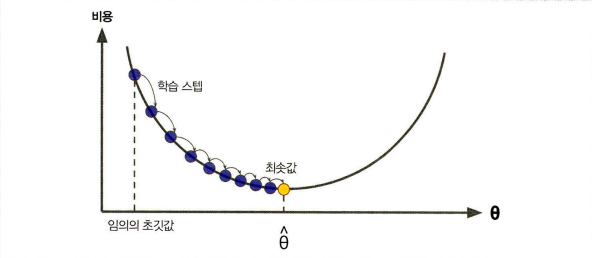

- 경사 하강법에서 중요한 파라미터는 스텝의 크기로, **학습률** 하이퍼파라미터로 결정됨.
    - 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림.
    - 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모름.
- 경사 하강법의 두 가지 문제점을 보임.
    - 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 **전역 최솟값 (global minimum)** 보다 덜 좋은 **지역 최솟값 (local minimum)** 에 수렴함.
    - 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못함.
- 다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수임.
    - 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻임. 또한 연속된 함수이고 기울기가 갑자기 변하지 않음.
    - &rarr; 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함.

### 4.2.1 배치 경사 하강법

- 경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트를 계산해야 함. 다시 말해 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 함. 이를 **편도함수**라고 함.

*비용 함수의 편도함수*
$$\frac{\partial}{\partial \theta_{j}}MSE(\theta) = \frac{2}{m}\sum_{m}^{i=1}(\theta^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}$$

In [12]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.36798517],
       [3.0760125 ]])

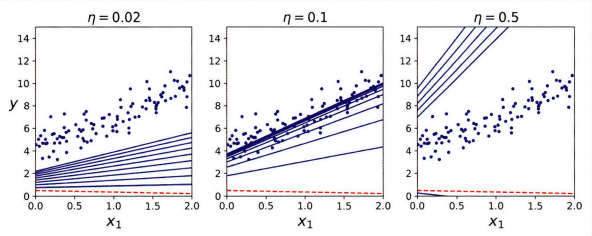

&rarr; 왼쪽: 학습률이 너무 낮음. 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것임.

&rarr; 학습률이 아주 적당해보임. 반복 몇 번 만에 이미 최적점에 수렴했음.

&rarr; 학습률이 너무 높음. 알고리즘이 이러저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산함.

### 4.2.2 확률적 경사 하강법

- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 사실임. 훈련 세트가 커지면 매우 느려지게 됨.
- **확률적 경사 하강법**: 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산
- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠름. 또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음.
- 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정함. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소함.
- 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않지만, 이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것임.
    - 시작할 때는 학습률을 크게 하고 (수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 함), 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 됨.
- 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현하기

In [14]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

- **에포크**: 일반적으로 한 반복에서 m번 되풀이 되고, 이때의 각 반복

&rarr; 전체 훈련 세트에 대해 1,000번 반복하는 동안 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달함.

In [15]:
theta

array([[4.36137031],
       [3.0680708 ]])

- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용함.

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

&rarr; 정규방정식으로 구한 것과 매우 비슷한 값을 얻었음.

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.33493579]), array([3.09122915]))

### 4.2.3 미니배치 경사 하강법

- **미니배치 경사 하강법**: 각 스텝에서 전체 훈련 세트(배치 경사 하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)을 기반으로 그레이디언트를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함.
- 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것임.


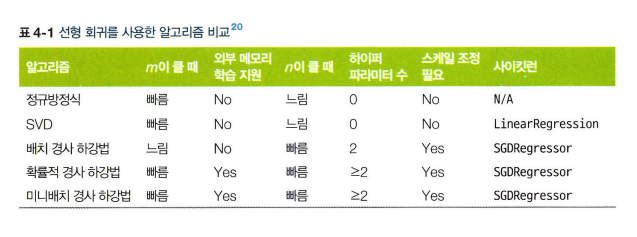

## **4.3 다항 회귀**

- **다항 회귀**: 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것
    - 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음.

*간단한 **2차방정식**으로 비선형 데이터를 생성*

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

- 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환
    - 훈련 세트에 있는 각 특성을 제곱(2차 다항)하여 새로운 특성으로 추가

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.74820328])

In [20]:
X_poly[0]

array([1.74820328, 3.05621471])

- 확장된 훈련 데이터에 LinearRegression을 적용

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.96814783]), array([[1.10632006, 0.52388755]]))

- 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음. PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문임.

## **4.4 학습 곡선**

- 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것임.
    - 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되고, 선형 모델은 과소적합임.
- 모델이 데이터에 과대적합 또는 과소적합되었는지 알 수 있는 방법
    - 모델의 일반화 성능을 추정하기 위해 교차 검증을 사용함.
        - 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합
        - 양쪽에 모두 좋지 않으면 과소적합
    - 학습 곡선을 살펴보는 것
        - 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄
        - 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨
- 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수 정의하기

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

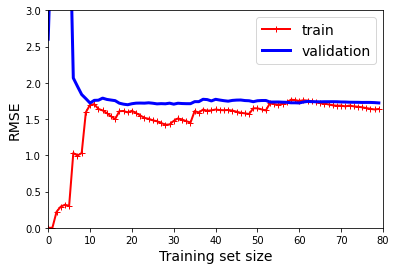

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()   

- 훈련 데이터의 성능

&rarr; 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동함. 하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해짐.
&rarr; 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승함. 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않음.

- 검증 데이터에 대한 모델의 성능

&rarr; 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큼. 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소함.
&rarr; 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워짐.

&rarr; 이 학습 곡선이 과소적합 모델의 전형적인 모습임.

- 10차 다항 회귀 모델의 학습 곡선 그려보기

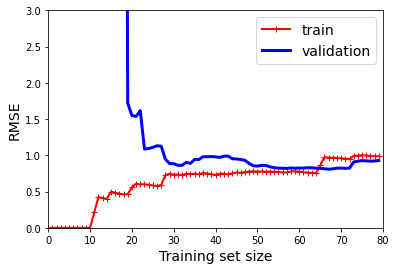

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

&rarr; 이 학습 곡선은 이전과 비슷해 보이지만 두 가지 매우 중요한 차이점이 있음.

&rarr; 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음.

&rarr; 두 곡선 사이에 공간이 있음. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고, 이는 과대적합 모델의 특징임. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐.

## **4.5 규제가 있는 선형 모델**

- 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것임. 자유도를 줄이면 데이터에 과대적합되기 더 어려워짐.
- 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것임.

### 4.5.1 릿지 회귀

- **릿지 회귀**(또는 **티호노프 규제**): 규제가 추가된 선형 회귀 버전
- 규제항 $α{1 \over 2}\sum\limits_{i = 1}^{n} \theta_i ^2$이 비용 함수에 추가됨.
    - 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력함.
    - 규제항은 훈련하는 동안에만 비용 함수에 추가됨. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함.
- 하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절함.
    - $\alpha = 0$이면 선형 회귀와 같아짐.
    - $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨.

*릿지 회귀의 비용 함수*
$$J(\theta) = MSE(\theta) + α{1 \over 2}\sum\limits_{i = 1}^{n} \theta_i ^2$$

- 편향 $\theta_0$는 규제되지 않음.

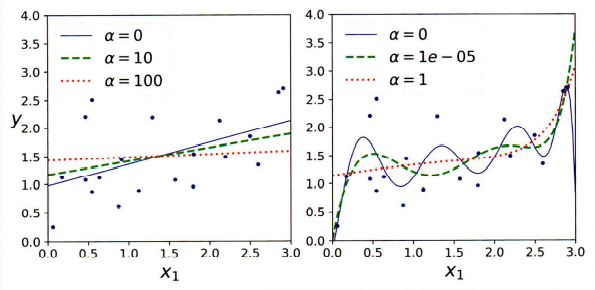
- 선형 데이터에 몇 가지 다른 $\alpha$를 사용해 릿지 모델을 훈련시킨 결과
    - 왼쪽 그래프: 평범한 릿지 모델을 사용해 선형적인 예측을 만들었음.
    - 오른쪽 그래프: PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용했음. 결국 이는 릿지 규제를 사용한 다항 회귀가 됨.
    - $\alpha$를 증가시킬수록 직선에 가까워지는 것을 볼 수 있음. 즉, 모델의 분산은 줄지만 편향은 커지게 됨.

- 선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있음.

*사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예*

In [37]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.95692303]])

- 확률적 경사 하강법을 사용

In [38]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.94022125])

### 4.5.2 라쏘 회귀

- 라쏘(Lasso) 회귀: 선형 회귀의 또 다른 규제된 버전
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만 $l_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$ 노름을 사용함.

*라쏘 회귀의 비용 함수*
$$J(\theta) = MSE(\theta) + \sum_{n}^{i=1}\left| \theta_i\right|$$

- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점임. 자동으로 특성 선택을 하고 희소 모델을 만듦.
- 라쏘와 다른 점은 크게 두 가지임.
    - 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작아짐. 따라서 경사 하강법이 자동으로 느려지고 수렴에 도움이 됨(진동이 없음).
    - $\alpha$를 증가시킬수록 최적의 파라미터가 원점에 가까워짐. 하지만 완전히 0이 되지는 않음.
- 라쏘의 비용 함수는 $\theta_i=0$에서 미분 가능하지 않음. 하지만 $\theta_i=0$일 때 서브그레이디언트 벡터 g를 사용하면 경사 하강법을 적용하는 데 문제가 없음.

*Lasso 클래스를 사용한 간단한 사이킷런 예제*

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.90991192])

### 4.5.3 엘라스틱넷

- 엘라스틱넷: 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절함.
    - r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같음.

*엘라스틱넷 비용 함수*
$$J(\theta) = MSE(\theta) + r\alpha\sum_{n}^{i=1}\left| \theta_i\right| + \frac{1-r}{2}\alpha\sum_{n}^{i=1}\theta_{i}^{2}$$

- 보통의 선형 회귀(즉, 규제가 없는 모델), 릿지, 라쏘 엘라스틱넷을 언제 사용해야 하는지
    - 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 함.
    - 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음.
    - 특성 수가 훈련 샘플 수보다 만헉나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호함.

*사이킷런의 ElasticNet을 사용한 예제*


In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.91041002])

### 4.5.3 조기 종료

- **조기 종료**: 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것

In [45]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [46]:
from copy import deepcopy

# 데이터 준비
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

## **4.6 로지스틱 회귀**

- **로지스틱 회귀**(또는 로짓 회귀)는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨.
    - 레이블이 '1': 양성 클래스
    - 레이블이 '0': 음성 클래스

### 4.6.1 확률 추정
- 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산함(그리고 편향을 더함).
- 대신 선형 회귀처럼 바로 결과를 출력하지 않고 로지스틱을 출력함.
- 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수임.

*로지스틱 함수*
$$σ(t) = \frac{1}{1+exp(-t)}$$

### 4.6.2 훈련과 비용 함수
- 훈련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것임.
- 로그 손실: 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것

### 4.6.3 결정 경계
*꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 만들기*

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [48]:
X = iris["data"][:, 3:]  # 꽃잎의 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1, 그렇지 않으면 0

- 로지스틱 회귀 모델 훈련

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

- 꽃잎의 너비가 0 ~ 3cm인 꽃에 대해 모델의 추정 확률을 계산

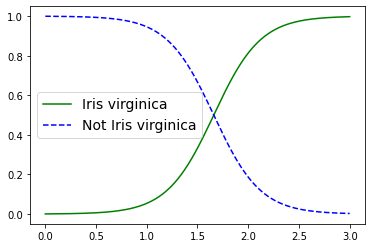

In [51]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend(loc="center left", fontsize=14)

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀
- **소프트맥스 회귀** (또는 **다항 로지스틱 회귀**): 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화한 로지스틱 회귀 모델
- 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 $s_k(x)$를 계산하고, 그 점수에 소프트맥스 함수(또는 정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정함.

*소프트맥스 함수*
$$\hat{p_k} = \sigma(s(x))_k = {exp(s_k(x)) \over \sum\limits_{j = 1}^{K}exp(s_j(x))}$$

- - $K$: 각 클래스 의 수
    - s(x): 샘플 x에 대한 각 클래스의 점수를 담은 벡터
    - $\sigma(x(x))_k$: 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률

- 모델이 타깃 클래스에 대해서는 높은 확률을(그리고 다른 클래스에 대해서는 낮은 확률을) 추정하도록 만드는 것이 목적임.
    - 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합함.
    - 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용됨.

*소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류해보기*

In [54]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [55]:
softmax_reg.predict([[5, 2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])